<a href="https://colab.research.google.com/github/Bahae9/Micro_club_datathon2024/blob/main/Visual_question_answering_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modules

In [1]:
from PIL import Image
import requests
from io import BytesIO
from transformers import ViltProcessor, ViltForQuestionAnswering, pipeline
from keras.utils import load_img

## VQA models

### Vilt-b32-finetuned model

In [ ]:
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

def model1(image, text):
  encoding = processor(image, text, return_tensors="pt")
  outputs = model(**encoding)
  logits = outputs.logits
  idx = logits.argmax(-1).item()
  answer = model.config.id2label[idx]
  return answer

### A model with the following approach
#### Giving a description to the image, then ansewring the quesiton based on that description

In [ ]:
img_description_model = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")
q_answering_model = pipeline("question-answering", model="deepset/roberta-base-squad2")
def model2(img, question):
  context = img_description_model.predict(img)[0]['generated_text']
  answer = q_answering_model(context=context, question=question)['answer']
  return answer

## Testing models

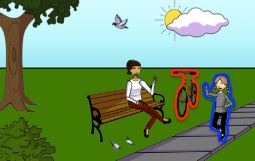

In [4]:
image1 = load_img('/content/Capture1.JPG')
image1

In [ ]:
print(model1(image1, 'How many persons are in the image?'))
print(model1(image1, 'How many children are in the image?'))
print(model1(image1, 'How many men are in the image?'))
print(model1(image1, 'How many walking persons are in the image?'))
print(model1(image1, 'How many sitting people are in the image?'))
print(model1(image1, 'What is the color of the chair?'))
print(model1(image1, 'What is the color of the sky?'))

2
1
0
1
1
brown
blue


In [ ]:
print(model2(image1, 'How many persons are in the image?'))
print(model2(image1, 'How many children are in the image?'))
print(model2(image1, 'How many men are in the image?'))
print(model2(image1, 'How many walking persons are in the image?'))
print(model2(image1, 'How many sitting people are in the image?'))
print(model2(image1, 'What is the color of the chair?'))
print(model2(image1, 'What is the color of the sky?'))

young boy
young boy
young boy is sitting on a bench with a cartoon character 
young boy
young boy




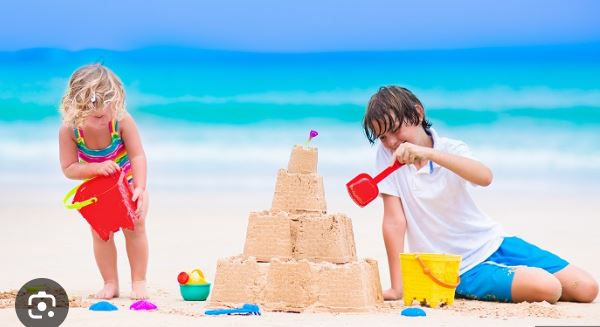

In [ ]:
image2 = load_img('/content/Capture2.JPG')
image2

In [ ]:
print(model1(image2, 'What are the children doing?'))
print(model1(image2, 'How many children are in the image?'))
print(model1(image2, 'What is in the middle of the image?'))
print(model1(image2, 'What is the color of the T-shirt?'))
print(model1(image2, 'Where is the image?'))

sitting
2
sand
white
beach


In [ ]:
print(model2(image2, 'What are the children doing?'))
print(model2(image2, 'How many children are in the image?'))
print(model2(image2, 'What is in the middle of the image?'))
print(model2(image2, 'What is the color of the T-shirt?'))
print(model2(image2, 'Where is the image?'))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


playing with a toy
two girls
two girls playing with a toy
two girls playing with a toy on the beach 
two girls playing with a toy on the beach


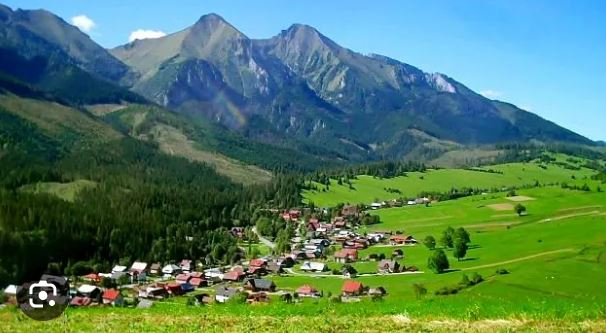

In [ ]:
image3 = load_img('/content/Capture3.JPG')
image3

In [ ]:
print(model1(image3, 'Where is the image?'))
print(model1(image3, 'What is the color of the sky?'))
print(model1(image3, 'What is the color of the ground?'))
print(model1(image3, 'How many birds are in the sky?'))
print(model1(image3, 'Are there houses in the image?'))

mountains
blue
green
0
yes


In [ ]:
print(model2(image3, 'Where is the image?'))
print(model2(image3, 'What is the color of the sky?'))
print(model2(image3, 'What is the color of the ground?'))
print(model2(image3, 'How many birds are in the sky?'))
print(model2(image3, 'Are there houses in the image?'))

mountain range






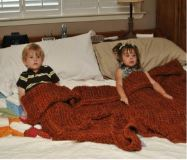

In [ ]:
image4 = load_img('/content/Capture4.JPG')
image4

In [ ]:
print(model1(image4, 'How many children are in the image?'))
print(model1(image4, 'How many boys are in the image?'))
print(model1(image4, 'What is the color of the bed?'))
print(model1(image4, 'What are the children doing?'))
print(model1(image4, 'What is the color of the quilt?'))

2
1
white
laying down
red


In [ ]:
print(model2(image4, 'How many children are in the image?'))
print(model2(image4, 'How many boys are in the image?'))
print(model2(image4, 'What is the color of the bed?'))
print(model2(image4, 'What are the children doing?'))
print(model2(image4, 'What is the color of the quilt?'))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


two
two

laying on a bed



## We can clearly see that the first model can capture the details in the image, while the second is not really efficient in that. However, the second model is more acceptable in answering the general descriptive question about the image than the first one.